In [1]:
import numpy as np

import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

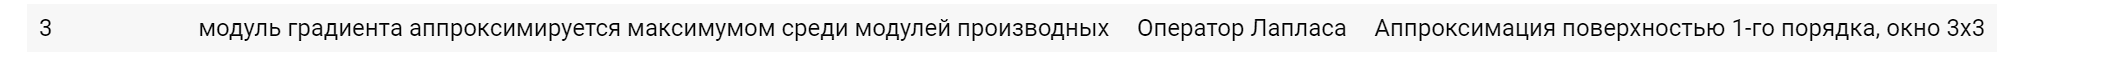

In [2]:
def getPicture(img, RGB = True, dpi = 150, title = ""):
    plt.figure(dpi = dpi)
    plt.axis("off")
    plt.title(title)
    if RGB == 1:  
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    elif RGB == 0:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    
    plt.show()
    
def getHistogramm_grayscale(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = hist/(img.shape[0]*img.shape[1])
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.grid()
    plt.plot(hist)
    plt.xlim([-10, 265])
    
def img_to_grayscale(img):
    image_gray = np.zeros((img.shape[0],img.shape[1]), dtype = np.uint8)
    image_gray[:,:] = 0.11*img[:,:,0]+0.59*img[:,:,1]+0.3*img[:,:,2]
    return image_gray

## 1.Считать цветное rgb изображение. Преобразовать в градации серого.

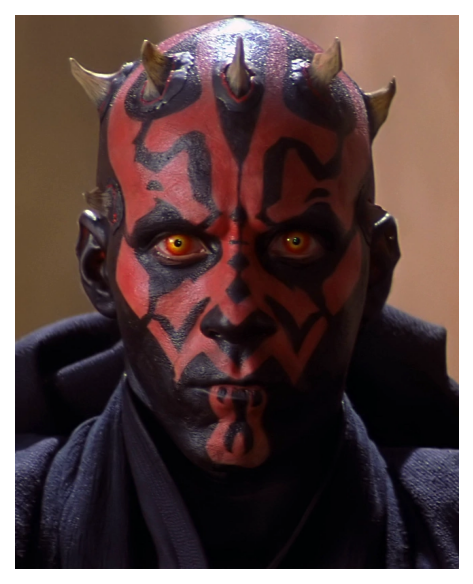

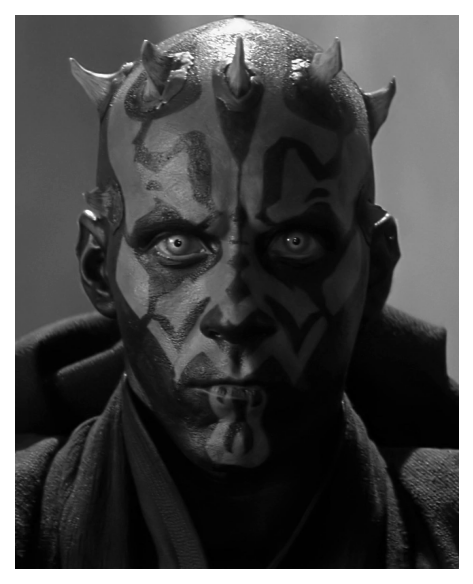

In [3]:
img = cv2.imread("5.webp")
getPicture(img, dpi = 150)
image_gray = img_to_grayscale(img)
getPicture(image_gray, RGB = False, dpi = 150)

## 2. Сделать выделение контуров методом простого градиента. В качестве значения модуля градиента использовать указанный в вариантах метод.

Вход: изображение из пункта 1
Вывод: бинарное изображение с контурами

In [35]:
def threshold(img_grayscale, threshold = 127):
    img_threshold = img_grayscale.copy()
    img_threshold[img_threshold < threshold] = 0
    img_threshold[img_threshold >= threshold] = 255
    return img_threshold

def func1(img, core):
    if core.shape[0] % 2 != 1 or core.shape[1] % 2 != 1:
        new_shape_x = core.shape[0] + (1 - core.shape[0] % 2)
        new_shape_y = core.shape[1] + (1 - core.shape[1] % 2)
        
        new_core = np.zeros((new_shape_x, new_shape_y), dtype = int)
        new_core[0:core.shape[0], 0:core.shape[1]] = core
        core = new_core
    stp_x = core.shape[0] - 1
    halfstp_x = stp_x//2
    stp_y = core.shape[1] - 1
    halfstp_y = stp_y//2

    img_bord = np.zeros((img.shape[0]+stp_x, img.shape[1]+stp_y), dtype = np.uint8)
    res = np.zeros((img.shape), dtype = np.uint8)
    
    img_bord[halfstp_x:img.shape[0]+halfstp_x,halfstp_y:img.shape[1]+halfstp_y] = img[:,:]
    
#     img_bord[0:halfstp_x, :] = img_bord[halfstp_x, :]
#     img_bord[img.shape[0]+halfstp_x:img.shape[0]+stp_x, :] = img_bord[img.shape[0]+halfstp_x-1, :]
    
#     img_bord[:, 0:halfstp_y] = img_bord[:, halfstp_y].reshape(img_bord.shape[0], 1)
#     img_bord[:, img.shape[1]+halfstp_y:img.shape[1]+stp_y] = img_bord[:, img.shape[1]+halfstp_y-1].reshape(img_bord.shape[0], 1)
    
    core = core.reshape(1,-1)

    for i in range(halfstp_x, img.shape[0]+halfstp_x):
        for j in range(halfstp_y, img.shape[1]+halfstp_y):
            window = img_bord[i-halfstp_x:i+halfstp_x+1,j-halfstp_y:j+halfstp_y+1].copy()
            summ = 0
            window = window.reshape(1,-1)              
            for k in range(0, window.shape[1]):
                summ = summ + (window[0,k]*core[0,core.shape[1]-1-k])
            res[i-halfstp_x,j-halfstp_y] = summ
    return res

In [39]:
help_img = np.array([[1,2,9],[1,2,9],[1,2,9]])

#help_img = np.array([[9,8,7],[6,5,4],[3,2,1]])
#image_gray

grad_x = np.abs(func1(image_gray, np.array([[-1, 1]])))
grad_y = np.abs(func1(image_gray, np.array([[-1], [1]])))
# print()
# print(grad_x)
# print()
# print(grad_y)

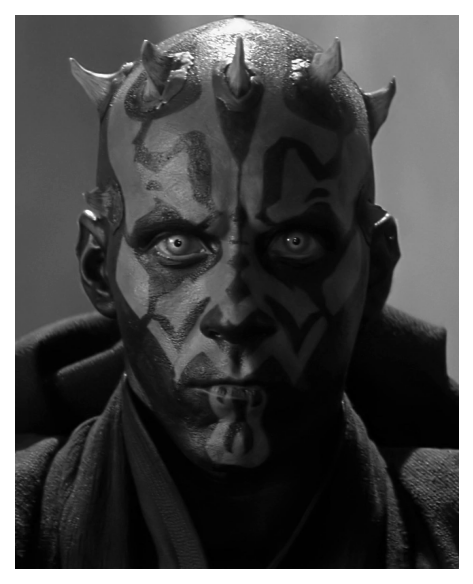

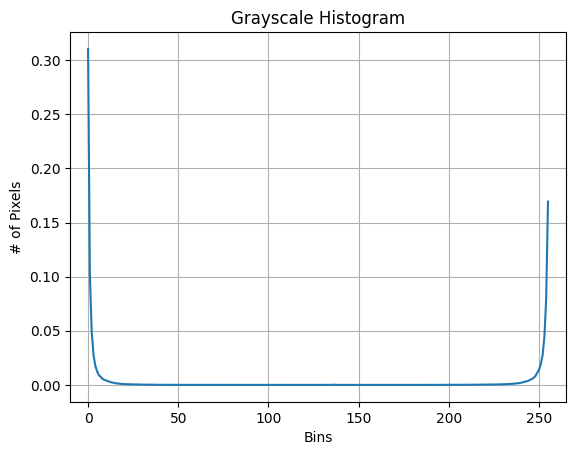

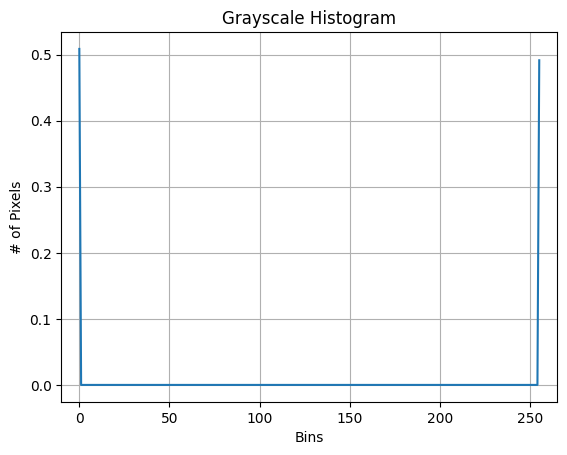

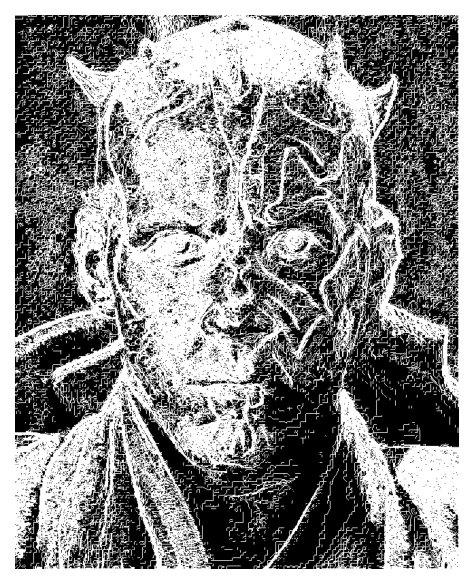

In [40]:
getPicture(image_gray, RGB = False, dpi = 150)

img_grad_contour = np.maximum(grad_x, grad_y)
#print(img_grad_contour)
getHistogramm_grayscale(img_grad_contour)
img_grad_contour_binary1 = threshold(img_grad_contour, 5)
getHistogramm_grayscale(img_grad_contour_binary1)
getPicture(img_grad_contour_binary1, RGB = False, dpi = 150)

## 3.Сделать выделение контуров методом по вариантам.

Вход: изображение из пункта 1
Вывод: бинарное изображение с контурами

In [81]:
laplasian = np.array([
    [0, 1, 0],
    [1,-4, 1],
    [0, 1 ,0]
])
img_grad_contour = np.abs(func1(image_gray, laplasian))

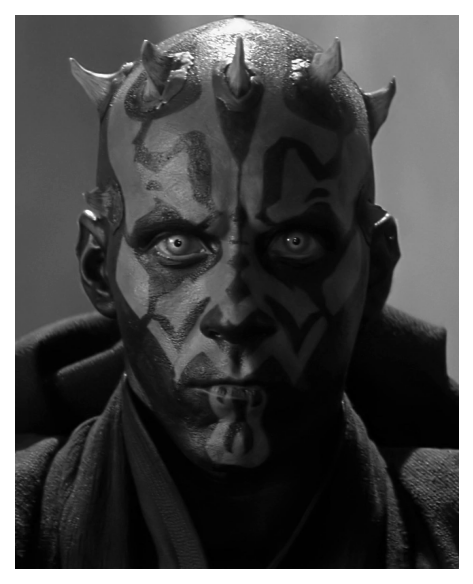

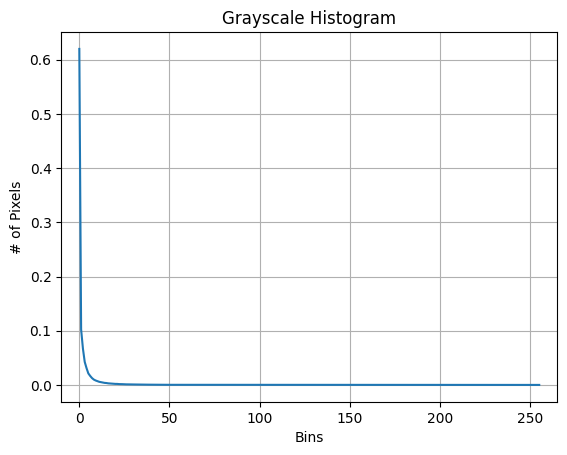

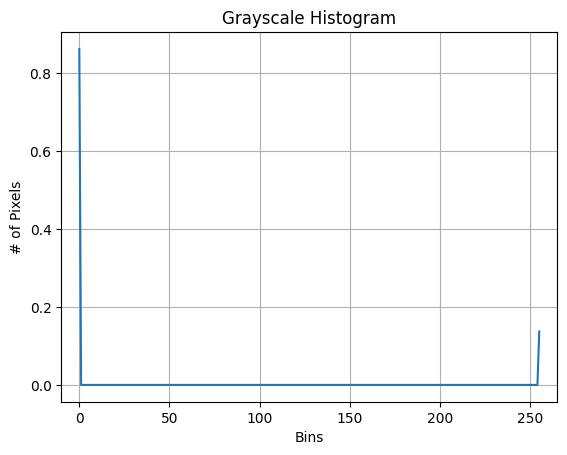

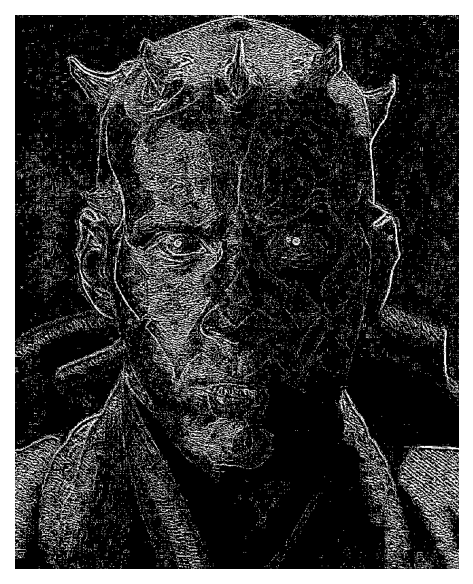

In [82]:
getPicture(image_gray, RGB = False, dpi = 150)

getHistogramm_grayscale(img_grad_contour)
img_grad_contour_binary1 = threshold(img_grad_contour, 5)
getHistogramm_grayscale(img_grad_contour_binary1)
getPicture(img_grad_contour_binary1, RGB = False, dpi = 150)

## 4.Сделать выделение контуров методом с согласованием. Тип функции аппроксимации и размер окна указан по вариантам.

Вход: изображение из пункта 1
Вывод: бинарное изображение с контурами

In [173]:
mask1 = (1/6) * np.array([
    [-1,-1,-1],
    [ 0, 0, 0],
    [ 1, 1, 1]
])
mask2 = mask1.T

In [174]:
x = func1(image_gray, mask1)
y = func1(image_gray, mask2)

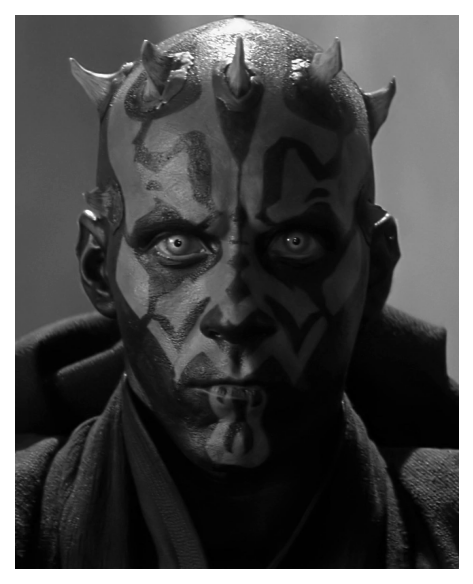

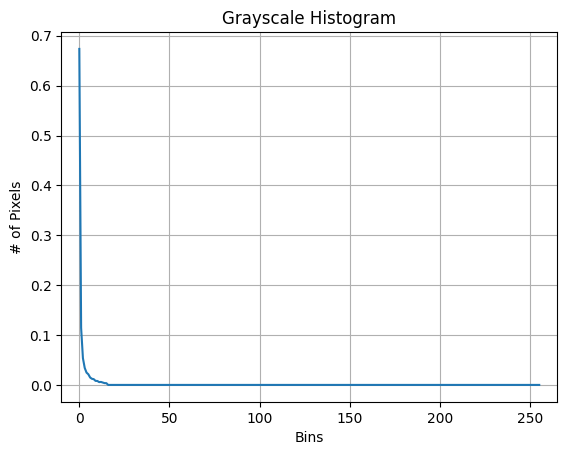

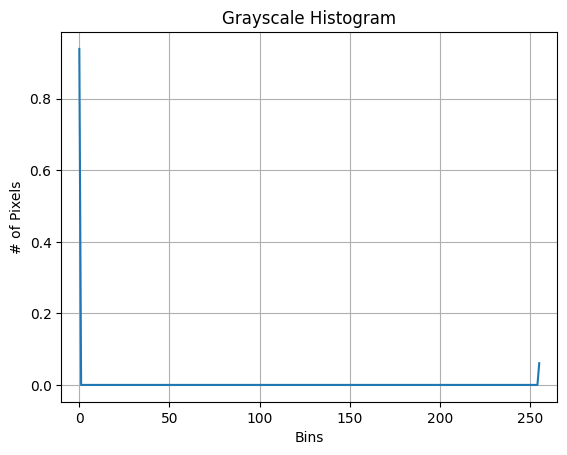

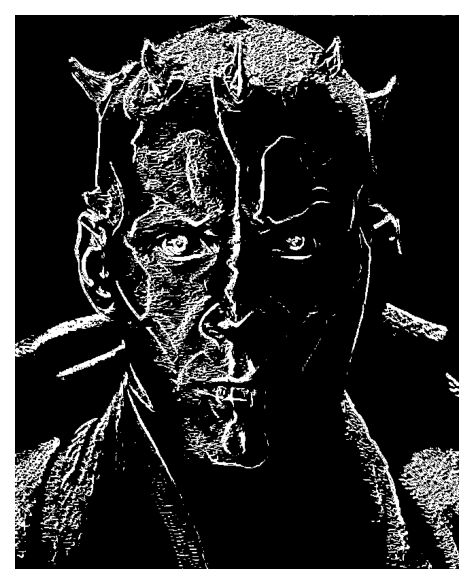

In [178]:
getPicture(image_gray, RGB = False, dpi = 150)

img_grad_contour = np.sqrt(x**2 + y**2).astype(np.uint8)
getHistogramm_grayscale(img_grad_contour)

img_grad_contour_binary = threshold(img_grad_contour, 4)
getHistogramm_grayscale(img_grad_contour_binary1)
getPicture(img_grad_contour_binary, RGB = False, dpi = 150)

## 5.Сделать выделение контуров методом Canny (Функция OpenCV).

Вход: изображение из пункта 1
Вывод: бинарное изображение с контурами

In [33]:
img_grad_contour = cv2.Canny(image_gray,4,75)

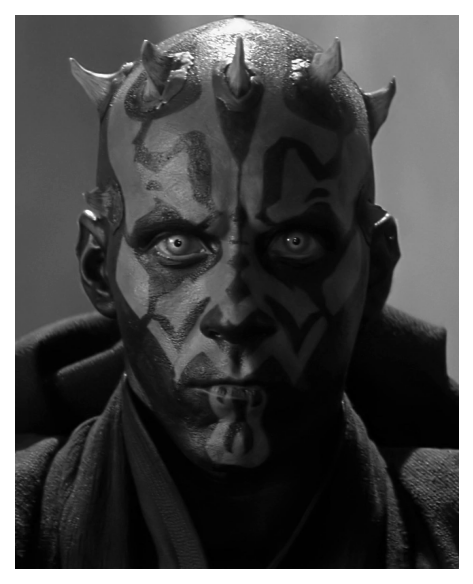

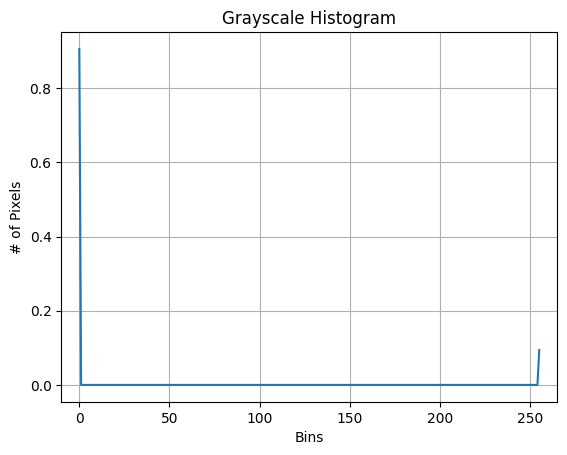

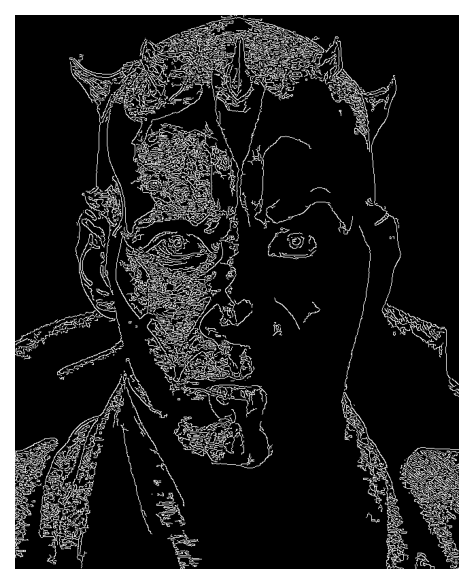

In [34]:
getPicture(image_gray, RGB = False, dpi = 150)

getHistogramm_grayscale(img_grad_contour)

getPicture(img_grad_contour, RGB = False, dpi = 150)